In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
data = pd.read_excel('/content/drive/MyDrive/ANZ synthesised transaction dataset.xlsx')

In [5]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [7]:
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [24]:
a = data['amount']
avg_transaction_amount = a.sum()/a.count()
print(avg_transaction_amount)

187.93358797641784


In [25]:
avg_transaction_per_month = a.sum()/3
print(avg_transaction_per_month)

754428.0666666668


In [9]:
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [11]:
data.nunique()

status                   2
card_present_flag        2
bpay_biller_code         3
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
merchant_code            1
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
dtype: int64

In [13]:
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [15]:
fdata = data.drop(['merchant_code','currency','country'] , axis=1)

In [27]:
fdata["date"].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

In [28]:

fdata["customer_id"].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

In [29]:
import matplotlib.pyplot as plt


In [32]:
df_date_count = fdata.groupby("date").count()

In [33]:
df_date_count.head()

,status,card_present_flag,bpay_biller_code,account,long_lat,txn_description,merchant_id,first_name,balance,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement
date,,,,,,,,,,,,,,,,,,,
2018-08-01,137,84,13,137,137,137,84,137,137,137,137,84,84,137,137,137,137,84,137
2018-08-02,152,99,10,152,152,152,99,152,152,152,152,99,99,152,152,152,152,99,152
2018-08-03,157,99,15,157,157,157,99,157,157,157,157,99,99,157,157,157,157,99,157
2018-08-04,118,94,0,118,118,118,94,118,118,118,118,94,94,118,118,118,118,94,118
2018-08-05,100,73,0,100,100,100,73,100,100,100,100,73,73,100,100,100,100,73,100


In [34]:

trans_vol = df_date_count["customer_id"].mean()
n_points = len(df_date_count.index)

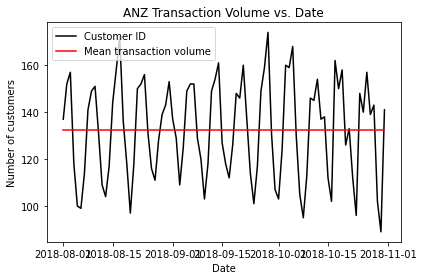

In [40]:
plt.figure()
plt.plot(df_date_count.index, df_date_count["customer_id"], c="black", label = "Customer ID")
plt.plot(df_date_count.index, np.linspace(trans_vol,trans_vol,n_points), c="r", label = "Mean transaction volume")
plt.title("ANZ Transaction Volume vs. Date")
plt.xlabel("Date")
plt.ylabel("Number of customers")
plt.legend()
plt.tight_layout()

In [42]:
df_date_mean = fdata.groupby("date").mean()

In [43]:
df_date_mean.head()

,card_present_flag,balance,age,amount
date,,,,
2018-08-01,0.750000,9933.975328,30.233577,218.014161
2018-08-02,0.858586,13963.617895,31.493421,143.331053
2018-08-03,0.797980,10187.786688,31.751592,242.653376
2018-08-04,0.787234,8206.809407,31.033898,53.356356
2018-08-05,0.739726,13297.525400,29.910000,44.265000


In [44]:
trans_amt = df_date_mean["amount"].mean()
n_points = len(df_date_count.index)

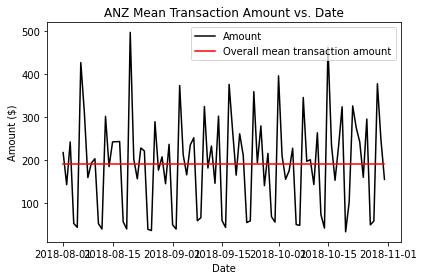

In [45]:
plt.figure()
plt.plot(df_date_count.index, df_date_mean["amount"], c="black", label = "Amount")
plt.plot(df_date_count.index, np.linspace(trans_amt,trans_amt,n_points), c="r", label = "Overall mean transaction amount")
plt.title("ANZ Mean Transaction Amount vs. Date")
plt.xlabel("Date")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

In [56]:
fdata.long_lat.value_counts().max()

578

In [57]:
fdata['long_lat'].value_counts().idxmax()

'153.41 -27.95'

In [59]:
fdata['merchant_long_lat'].value_counts().idxmax()

'151.21 -33.87'